In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('../Datasets/austin_weather.csv')

In [21]:
df

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [22]:
df = df[['Date', 'TempAvgF']]
df

,Date,TempAvgF
0,2013-12-21,60
1,2013-12-22,48
2,2013-12-23,45
3,2013-12-24,46
4,2013-12-25,50
...,...,...
1314,2017-07-27,89
1315,2017-07-28,91
1316,2017-07-29,92
1317,2017-07-30,93


In [23]:
df['Date'].map(lambda x: x[:4])

0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
1314    2017
1315    2017
1316    2017
1317    2017
1318    2017
Name: Date, Length: 1319, dtype: object

In [24]:
# df.loc[:,'Year'] = df.loc[:,'Date'].map(lambda x: int(x[:4]))
df.loc[:, 'Year'] = df.loc[:, 'Date'].str.slice(0,4).astype('int')
df.loc[:, 'Month'] = df.loc[:, 'Date'].str.slice(5,7).astype('int')
df.loc[:, 'Day'] = df.loc[:, 'Date'].str.slice(8,10).astype('int')
df_new = df[df.index<365]
df_new

c:\Users\Judit\Documents\Qsync\PythonGyakorlas\SupervisedLearningWorkshop\slw\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\Users\Judit\Documents\Qsync\PythonGyakorlas\SupervisedLearningWorkshop\slw\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Date,TempAvgF,Year,Month,Day
0,2013-12-21,60,2013,12,21
1,2013-12-22,48,2013,12,22
2,2013-12-23,45,2013,12,23
3,2013-12-24,46,2013,12,24
4,2013-12-25,50,2013,12,25
...,...,...,...,...,...
360,2014-12-16,55,2014,12,16
361,2014-12-17,51,2014,12,17
362,2014-12-18,55,2014,12,18
363,2014-12-19,53,2014,12,19


In [25]:
wnd = 20
SMA = df_new.TempAvgF.rolling(wnd).mean()
SMA

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
360    59.8
361    59.7
362    59.6
363    59.0
364    58.0
Name: TempAvgF, Length: 365, dtype: float64

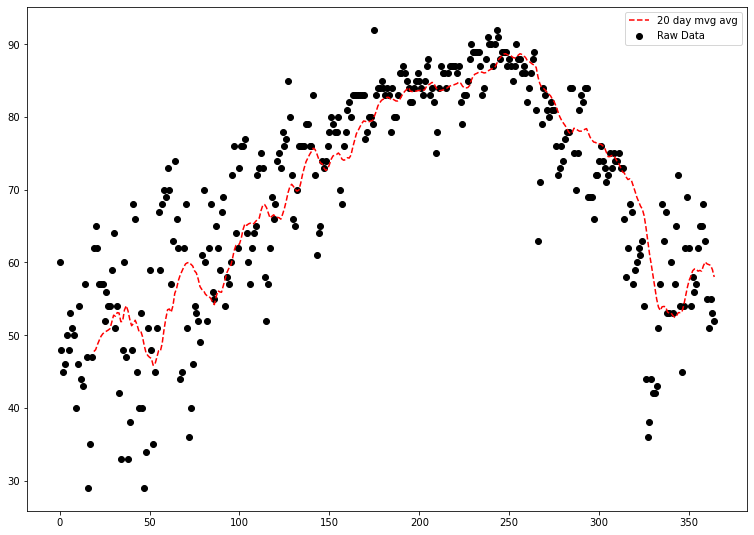

In [40]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1])

ax.scatter(
    df_new.index,
    df_new.TempAvgF,
    c='k',
    label = 'Raw Data'
)

ax.plot(
    df_new.index,
    SMA,
    linestyle = '--',
    c = 'r',
    label = f'{wnd} day mvg avg',
)

ax.legend()

plt.show()